# Analiza PCA - Wariant 4

Zadanie: Obliczenie środka, osi głównych oraz kąta obrotu danych dwuwymiarowych z pliku `4.csv`

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = [24, 8]

In [24]:
# Wczytanie danych z pliku CSV
data = pd.read_csv('4.csv', header=None)
X_data = data.values  # Konwersja do numpy array

# Transpozycja danych - pierwszy wiersz to współrzędne X, drugi to Y
X = X_data.T

n_points = X.shape[1]
print(f"Liczba punktów: {n_points}")
print(f"Kształt danych: {X.shape}")

Liczba punktów: 2
Kształt danych: (10000, 2)


## Wizualizacja oryginalnych danych

## Wczytanie danych z pliku CSV

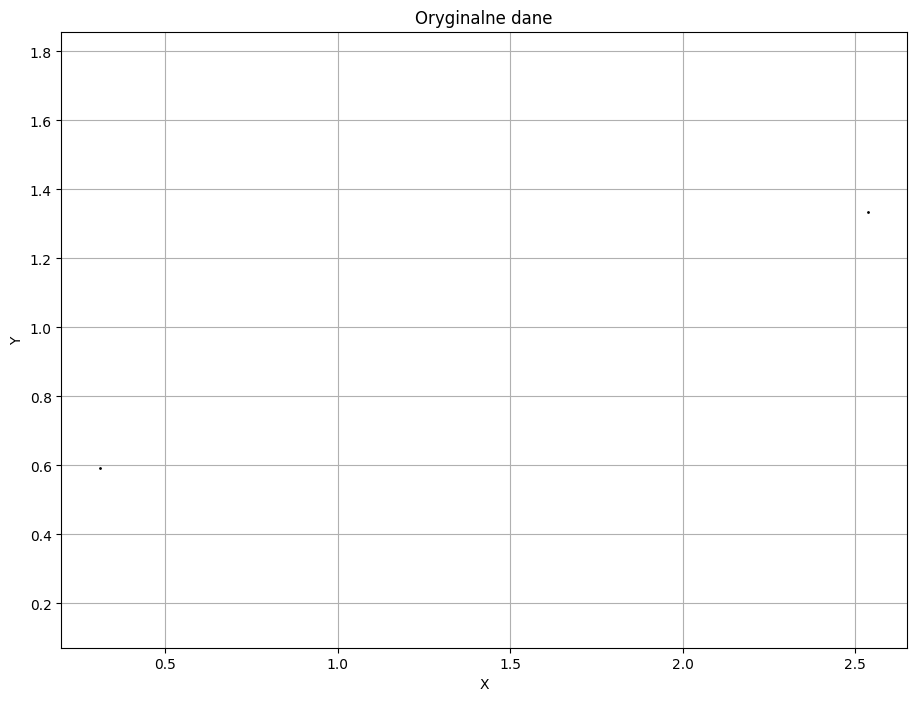

In [25]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[0,:], X[1,:], '.', color='k', markersize=2)
ax1.set_title('Oryginalne dane')
ax1.grid()
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.axis('equal')
plt.show()

## Analiza PCA

### 1. Obliczenie środka danych (średniej)

In [26]:
Xavg = np.mean(X, axis=1)
print(f"Środek danych (mean):")
print(f"  X_mean = {Xavg[0]:.6f}")
print(f"  Y_mean = {Xavg[1]:.6f}")

Środek danych (mean):
  X_mean = 1.423998
  Y_mean = 0.964422


### 2. Centrowanie danych (odejmowanie średniej)

In [27]:
B = X - np.tile(Xavg, (n_points, 1)).T
print(f"Dane po centrowaniu - kształt: {B.shape}")

Dane po centrowaniu - kształt: (10000, 2)


### 3. Rozkład SVD i wyznaczenie składowych głównych

In [28]:
U, S, VT = np.linalg.svd(B / np.sqrt(n_points), full_matrices=False)

print(f"\nMacierz U (kierunki składowych głównych):")
print(U)
print(f"\nWartości osobliwe S (odchylenia standardowe wzdłuż składowych głównych):")
print(S)

# Obliczenie wariancji wyjaśnianej przez każdą składową
explained_variance = S**2
variance_ratio = explained_variance / explained_variance.sum()
print(f"\nWariancja wyjaśniana przez składowe:")
print(f"  PC1: {variance_ratio[0]*100:.2f}%")
print(f"  PC2: {variance_ratio[1]*100:.2f}%")


Macierz U (kierunki składowych głównych):
[[-8.01788171e-03  9.93168792e-01]
 [-2.66764410e-03 -5.60082434e-05]
 [-4.31410294e-03  1.19037182e-04]
 ...
 [-1.45351938e-02  7.31446887e-04]
 [ 1.05432696e-02  4.04544641e-04]
 [ 6.91025373e-04  8.88186638e-04]]

Wartości osobliwe S (odchylenia standardowe wzdłuż składowych głównych):
[1.38950756e+02 6.40414182e-14]

Wariancja wyjaśniana przez składowe:
  PC1: 100.00%
  PC2: 0.00%


### 4. Obliczenie kąta obrotu głównej osi

In [29]:
rotation_angle = np.arctan2(U[1, 0], U[0, 0])
rotation_angle_deg = np.degrees(rotation_angle)

print(f"\nKąt obrotu głównej osi:")
print(f"  θ = {rotation_angle:.6f} rad")
print(f"  θ = {rotation_angle_deg:.2f}°")

print(f"\nOsi główne (wektory własne):")
print(f"  Oś 1 (PC1): [{U[0,0]:8.6f}, {U[1,0]:8.6f}]")
print(f"  Oś 2 (PC2): [{U[0,1]:8.6f}, {U[1,1]:8.6f}]")

print(f"\nDługości osi (wartości osobliwe):")
print(f"  Długość osi 1: {S[0]:.6f}")
print(f"  Długość osi 2: {S[1]:.6f}")


Kąt obrotu głównej osi:
  θ = -2.820402 rad
  θ = -161.60°

Osi główne (wektory własne):
  Oś 1 (PC1): [-0.008018, -0.002668]
  Oś 2 (PC2): [0.993169, -0.000056]

Długości osi (wartości osobliwe):
  Długość osi 1: 138.950756
  Długość osi 2: 0.000000


## Wizualizacja wyników PCA

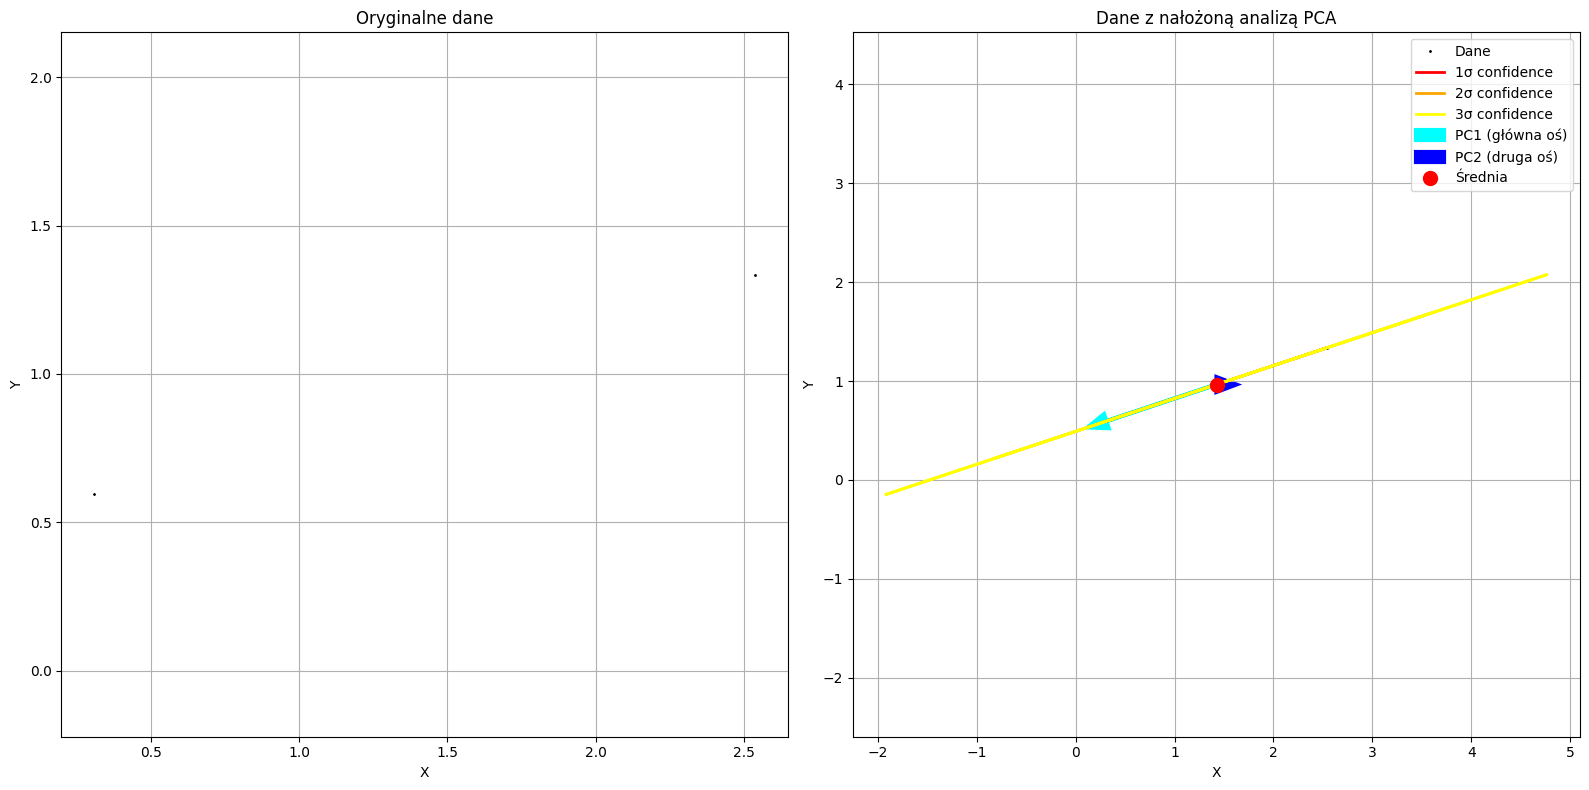

In [30]:
fig = plt.figure(figsize=(16, 8))

# Lewy wykres - oryginalne dane
ax1 = fig.add_subplot(121)
ax1.plot(X[0,:], X[1,:], '.', color='k', markersize=2)
ax1.set_title('Oryginalne dane')
ax1.grid()
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.axis('equal')

# Prawy wykres - dane z nałożonymi składowymi głównymi
ax2 = fig.add_subplot(122)
ax2.plot(X[0,:], X[1,:], '.', color='k', markersize=2, label='Dane')
ax2.grid()
ax2.axis('equal')
ax2.set_title('Dane z nałożoną analizą PCA')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

# Rysowanie elips reprezentujących przedziały ufności (1σ, 2σ, 3σ)
theta = 2 * np.pi * np.arange(0, 1, 0.01)

# Elipsy 1σ, 2σ, 3σ
for i, (std_multiplier, color_shade) in enumerate([(1, 'r'), (2, 'orange'), (3, 'yellow')]):
    Xstd = U @ np.diag(S) @ np.array([np.cos(theta), np.sin(theta)])
    ax2.plot(Xavg[0] + std_multiplier * Xstd[0,:], 
             Xavg[1] + std_multiplier * Xstd[1,:], 
             '-', color=color_shade, linewidth=2, 
             label=f'{std_multiplier}σ confidence')

# Rysowanie składowych głównych (wektorów PC1 i PC2)
# PC1 - pierwsza składowa główna
ax2.arrow(Xavg[0], Xavg[1], U[0,0]*S[0], U[1,0]*S[0], 
          head_width=0.15, head_length=0.2, fc='cyan', ec='cyan', 
          linewidth=3, label='PC1 (główna oś)')

# PC2 - druga składowa główna
ax2.arrow(Xavg[0], Xavg[1], U[0,1]*S[1], U[1,1]*S[1], 
          head_width=0.15, head_length=0.2, fc='blue', ec='blue', 
          linewidth=3, label='PC2 (druga oś)')

# Punkt środkowy
ax2.plot(Xavg[0], Xavg[1], 'ro', markersize=10, label='Średnia')

ax2.legend()
plt.tight_layout()
plt.show()

## Podsumowanie wyników

**Wyniki analizy PCA dla danych z pliku `4.csv`:**

In [ ]:
print("="*60)
print("PODSUMOWANIE ANALIZY PCA - WARIANT 4")
print("="*60)
print(f"\n1. ŚRODEK DANYCH (ŚREDNIA):")
print(f"   μ = [{Xavg[0]:.6f}, {Xavg[1]:.6f}]")

print(f"\n2. OSIE GŁÓWNE (WEKTORY WŁASNE - KIERUNKI):")
print(f"   Pierwsza oś główna (PC1):  [{U[0,0]:8.6f}, {U[1,0]:8.6f}]")
print(f"   Druga oś główna (PC2):     [{U[0,1]:8.6f}, {U[1,1]:8.6f}]")

print(f"\n3. DŁUGOŚCI OSI (WARTOŚCI OSOBLIWE):")
print(f"   Długość osi PC1: {S[0]:.6f}")
print(f"   Długość osi PC2: {S[1]:.6f}") 

print(f"\n4. KĄT OBROTU GŁÓWNEJ OSI:")
print(f"   θ = {rotation_angle:.6f} rad")
print(f"   θ = {rotation_angle_deg:.2f}°")

print(f"\n5. WARIANCJA WYJAŚNIANA:")
print(f"   PC1: {variance_ratio[0]*100:.2f}%")
print(f"   PC2: {variance_ratio[1]*100:.2f}%")

print(f"\n6. LICZBA PUNKTÓW: {n_points}")
print("="*60)

PODSUMOWANIE ANALIZY PCA - WARIANT 4

1. ŚRODEK DANYCH (ŚREDNIA):
   μ = [1.423998, 0.964422]

2. OSIE GŁÓWNE (WEKTORY WŁASNE - KIERUNKI):
   Pierwsza oś główna (PC1):  [-0.008018, -0.002668]
   Druga oś główna (PC2):     [0.993169, -0.000056]

3. DŁUGOŚCI OSI (WARTOŚCI OSOBLIWE):
   Długość osi PC1: 138.950756
   Długość osi PC2: 0.000000

4. KĄT OBROTU GŁÓWNEJ OSI:
   θ = -2.820402 rad
   θ = -161.60°

5. WARIANCJA WYJAŚNIANA:
   PC1: 100.00%
   PC2: 0.00%

6. LICZBA PUNKTÓW: 2
